In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
import seaborn as sns
import plotly
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
labelencoder = LabelEncoder()
enc = OneHotEncoder()
from sklearn.compose import ColumnTransformer

In [2]:
# cargá el dataset
data =pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
print(data.shape)

(146660, 19)


In [3]:
data.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [4]:
# filter properties by type that are Casa, PH or Departamento
property_type_mask=np.logical_or(np.logical_or(data['property_type']=='Casa',data['property_type']=='PH'),data['property_type']=='Departamento')

# Filter properties that are in Capital Federal
region_mask=np.logical_and(data['l2']=='Capital Federal',property_type_mask)


data2=data[region_mask]


In [5]:
data2['l3'].value_counts()

Palermo                 13007
Almagro                  7498
Belgrano                 6876
Caballito                6610
Villa Crespo             6429
Recoleta                 5869
Villa Urquiza            3325
Barrio Norte             3198
Balvanera                2941
Flores                   2535
Nuñez                    1966
Puerto Madero            1746
Colegiales               1582
San Cristobal            1520
Villa Devoto             1416
Villa del Parque         1346
Parque Centenario        1315
Saavedra                 1110
Liniers                  1042
Paternal                 1040
San Telmo                1024
Floresta                  935
Villa Luro                926
Boedo                     915
Monserrat                 823
Parque Chacabuco          822
Retiro                    819
San Nicolás               810
Las Cañitas               788
Once                      774
Barracas                  749
Chacarita                 743
Mataderos                 735
Villa Puey

In [6]:
# Ver el tipo de cada columna y cuantos elementos non-null hay en cada una de ellas 
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91485 entries, 0 to 146558
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_date       91485 non-null  object 
 1   end_date         91485 non-null  object 
 2   created_on       91485 non-null  object 
 3   lat              86951 non-null  float64
 4   lon              86937 non-null  float64
 5   l1               91485 non-null  object 
 6   l2               91485 non-null  object 
 7   l3               91485 non-null  object 
 8   rooms            91485 non-null  float64
 9   bedrooms         91485 non-null  float64
 10  bathrooms        89314 non-null  float64
 11  surface_total    82568 non-null  float64
 12  surface_covered  82250 non-null  float64
 13  price            91485 non-null  float64
 14  currency         91485 non-null  object 
 15  title            91485 non-null  object 
 16  description      91485 non-null  object 
 17  property_ty

In [7]:
# remove columns with irrelevant data 
data1=data2.drop(['l1','currency','title','description'],axis=1)

In [8]:
# make a copy of the dataframe
dataproof=data1.copy()

In [9]:
data1

,start_date,end_date,created_on,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146554,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH,Venta
146555,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH,Venta
146556,2019-07-31,2020-01-17,2019-07-31,-34.584134,-58.436389,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,PH,Venta
146557,2019-07-31,2019-08-23,2019-07-31,-34.583995,-58.417645,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento,Venta


In [10]:
# select relevant columns
dataproof=dataproof.iloc[:,5:18]
dataproof

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,operation_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento,Venta
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,Venta
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,Venta
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,Venta
5,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH,Venta
...,...,...,...,...,...,...,...,...,...,...
146554,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH,Venta
146555,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH,Venta
146556,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,PH,Venta
146557,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento,Venta


In [11]:
# Select desired columns
data2=data2.iloc[:,3:18]
data2=data2.drop(['l1','currency','title','description'],axis=1)

In [12]:
data2.head()

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,-34.593779,-58.441239,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH


In [13]:
# select columns that have information about the rooms
df_rooms=data2.iloc[:,4:7]
# select columns that have information about the surface
df_surfaces=data2.iloc[:,7:9]

In [14]:
# change type of columns. Object to Category
objdtype_cols = data2.select_dtypes(["object"]).columns
data[objdtype_cols] = data2[objdtype_cols].astype('category')

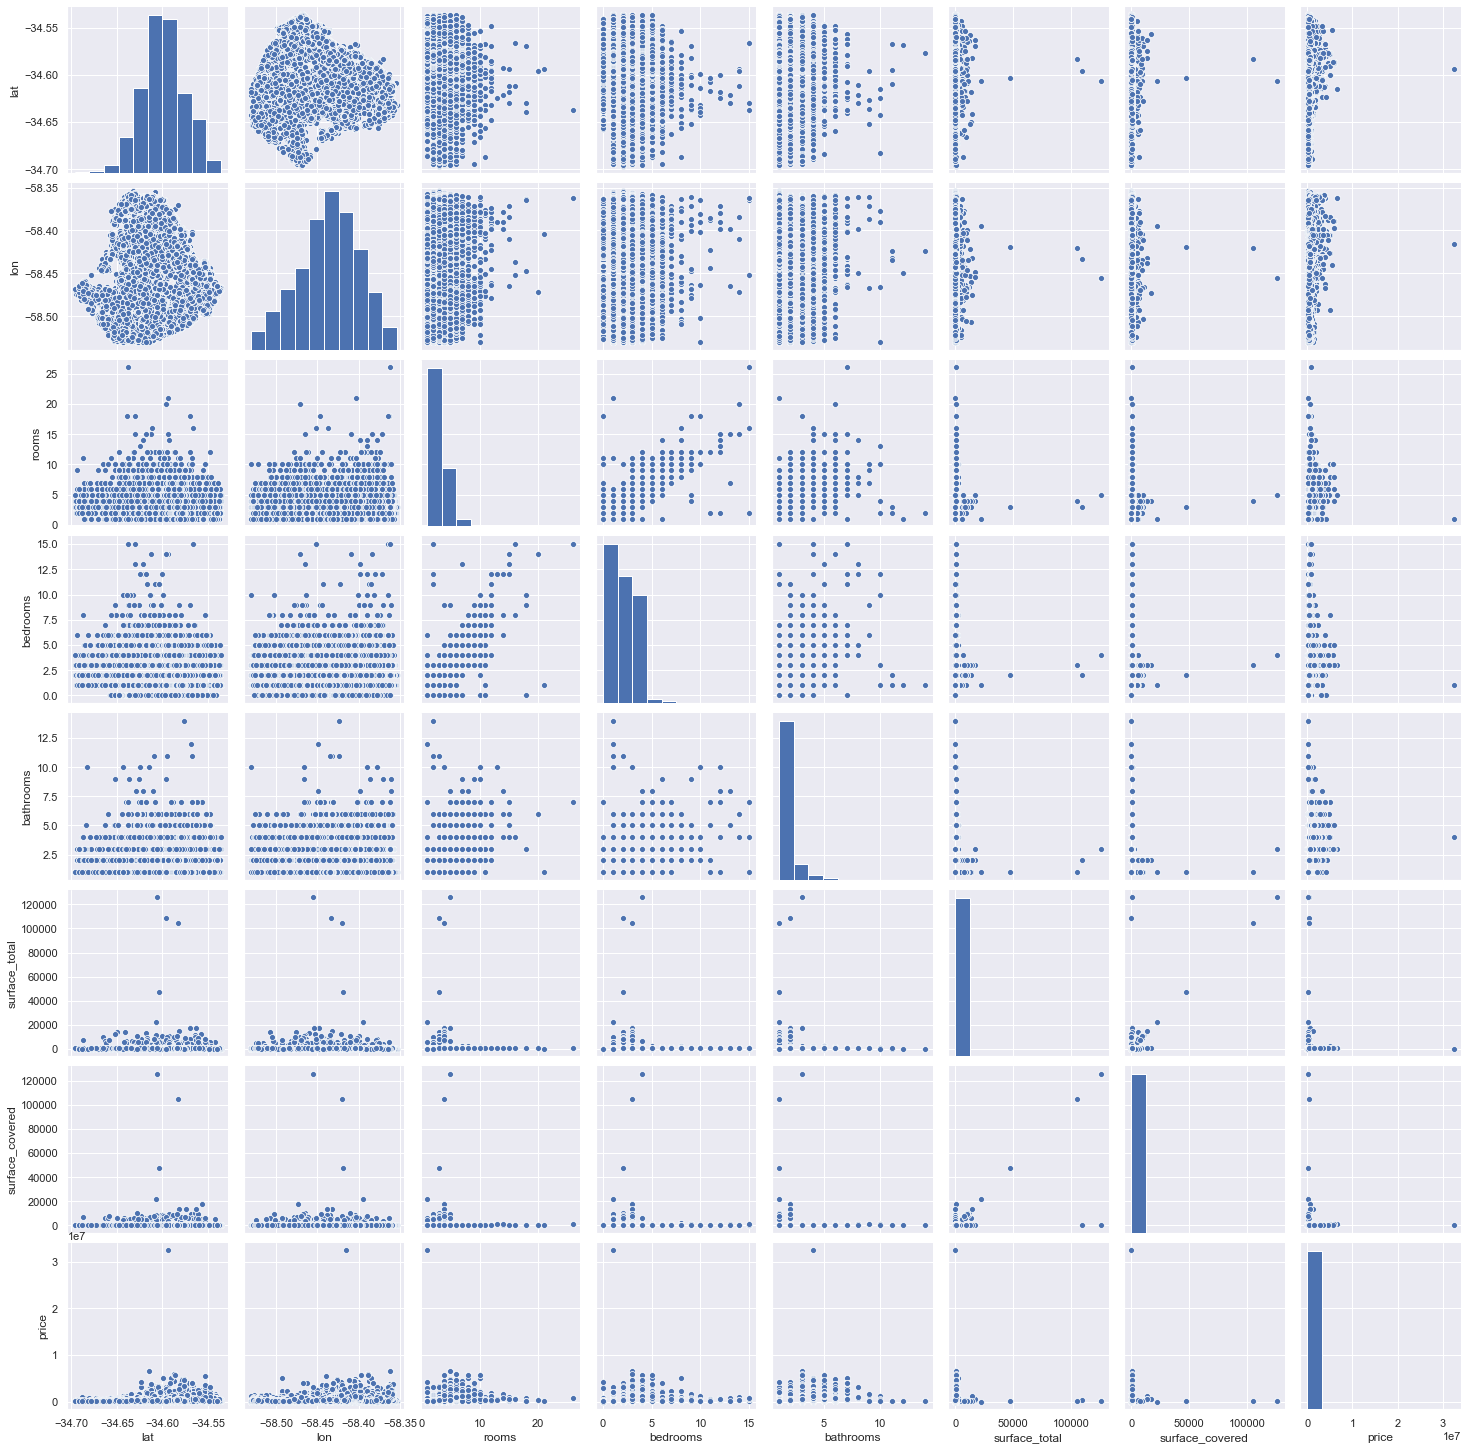

In [15]:
sns.pairplot(data2)

In [16]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,86951.0,-34.599081,0.023957,-34.696419,-34.613757,-34.599446,-34.584148,-3.453582e+01
lon,86937.0,-58.436002,0.036297,-58.530468,-58.459605,-58.433789,-58.410143,-5.835393e+01
rooms,91485.0,2.964278,1.314704,1.000000,2.000000,3.000000,4.000000,2.600000e+01
bedrooms,91485.0,1.960278,1.072946,0.000000,1.000000,2.000000,3.000000,1.500000e+01
bathrooms,89314.0,1.560147,0.860309,1.000000,1.000000,1.000000,2.000000,1.400000e+01
surface_total,82568.0,112.626369,980.713664,10.000000,49.000000,71.000000,111.000000,1.260620e+05
surface_covered,82250.0,94.966310,778.515243,1.000000,44.000000,63.000000,96.000000,1.260620e+05
price,91485.0,259500.258239,322265.440799,6000.000000,120000.000000,175000.000000,279000.000000,3.243423e+07


In [115]:
df_rooms.head()

,rooms,bedrooms,bathrooms
0,7.0,7.0,2.0
1,2.0,1.0,2.0
2,2.0,1.0,1.0
3,2.0,1.0,1.0
5,2.0,1.0,1.0


Text(0.5, 1.0, 'Numero de piesas, cuartos y baños ')

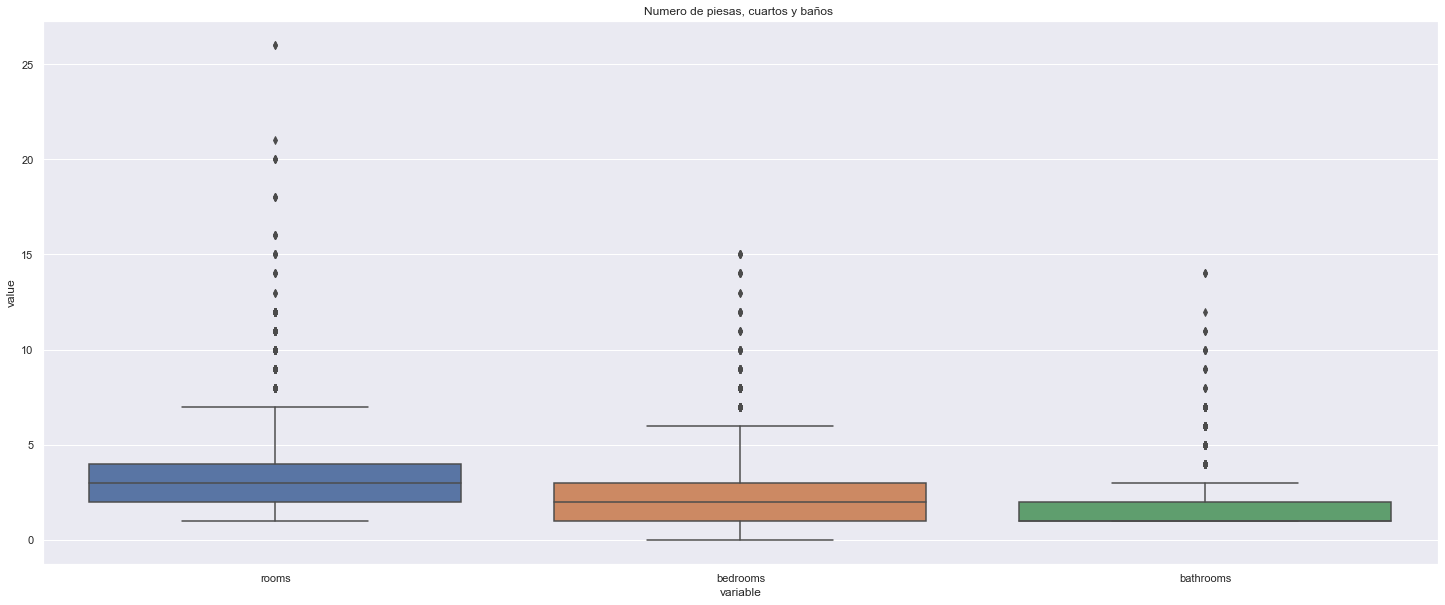

In [120]:
ax=sns.boxplot(x="variable", y="value", data=pd.melt(df_rooms))
ax.set_title("Numero de piesas, cuartos y baños ")

Text(0.5, 1.0, 'Relacion entre tipo de propiedad y numero de cuartos')

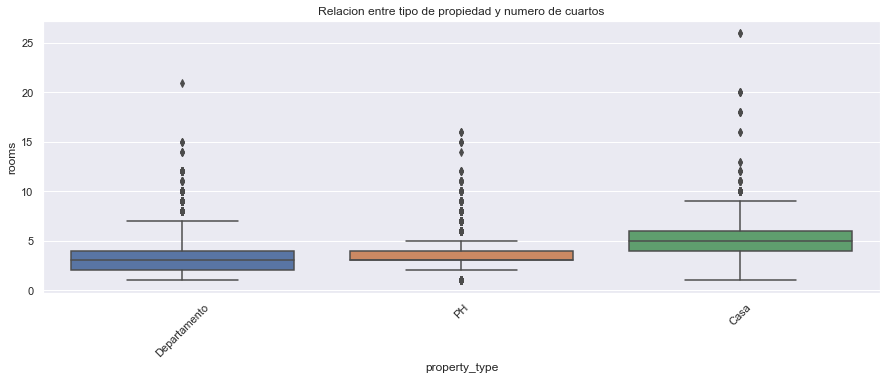

In [19]:
# numbers=np.arange(0,15)
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.boxplot(y='rooms',x='property_type', data=data2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title("Relacion entre tipo de propiedad y numero de cuartos")

<AxesSubplot:xlabel='variable', ylabel='value'>

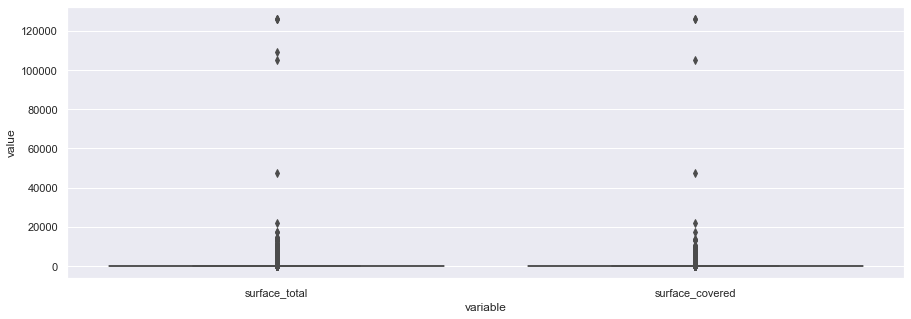

In [20]:
sns.boxplot(x="variable", y="value", data=pd.melt(df_surfaces))

Text(0.5, 1.0, 'Cantidad de propiedades por tipo de propiedad')

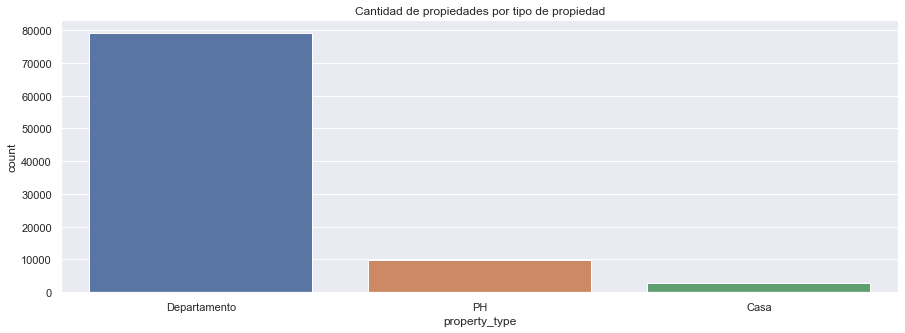

In [21]:
# Plot cuantas propiedades hay por tipo de propiedad
sns.countplot(data2['property_type'],
              order = data['property_type'].value_counts().index).set_title("Cantidad de propiedades por tipo de propiedad")

In [22]:
data2['property_type'].value_counts()

Departamento    79029
PH               9764
Casa             2692
Name: property_type, dtype: int64

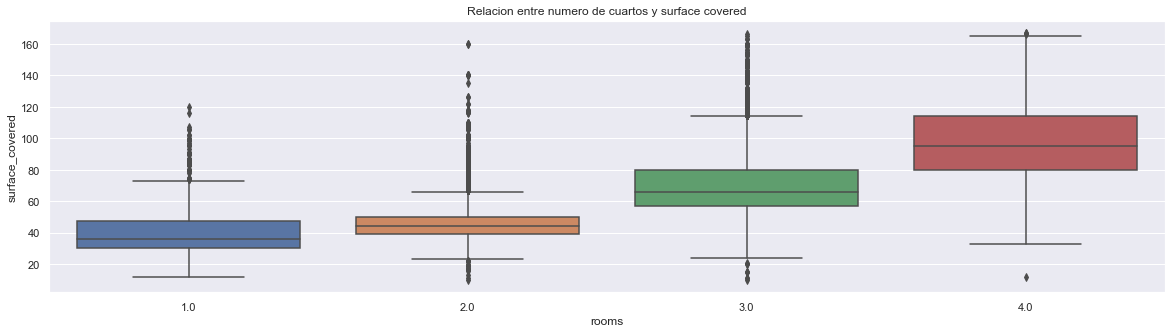

In [121]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.boxplot(y='surface_covered',x='rooms', data=data2).set_title("Relacion entre numero de cuartos y surface covered")

<AxesSubplot:xlabel='price'>

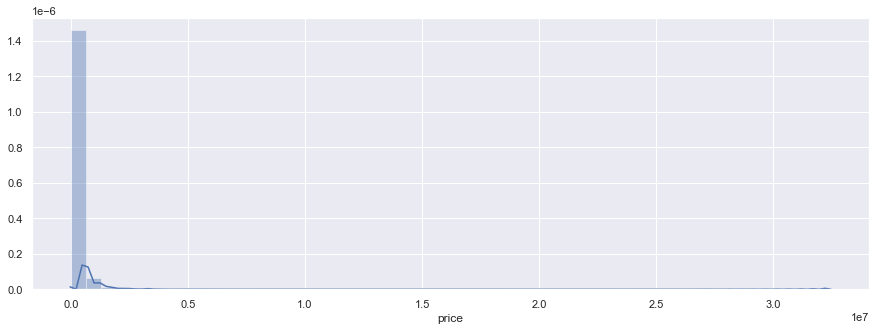

In [24]:
sns.distplot(data2.price)


# De acuerdo a los anteriores graficos se pueden hacer varios analisis de los datos:
1. Hay propiedades que tanto en las columnas de rooms, bathrooms y bedrooms tienen valores muy atipicos 
2. Todos los 3 tipos de propiedades presentan propiedades con gran cantidad de cuartos 
3. No necesariamente las propiedades con mas rooms son las propiedades con una surface_covered mas grande. analizar mas
 * En que ciudad y barrio se encuentran estas propiedades de mayor area?
 * Hay propiedades con errores en alguna de estas columnas? 
4. El mayor numero de propiedades son Departamentos, Casas y PH
5. El rango de precios es muy alto 
6. Hay congruencia en que entre mas cuartos tiene una propiedad, mayor area ocupa

# pasos a seguir:
1. Identificar cuales y la razon de los outliers
2. Inputar valores dependiendo de la razon del error
3. filtrar con un metodo de IQR
4. Usar reducción de dimensiones (PCA) 

In [25]:
# Usar el dataset filtrado para inputar valores 
# Define .25 and .75 percentiles
# Use IQR method 
# The interquartile range (IQR) is a measure of variability, based on dividing a data set into quartiles. Quartiles divide a rank-ordered data set into four equal parts.
# The values that divide each part are called the first, second, and third quartiles; and they are denoted by Q1, Q2, and Q3, respectively.
def calculate_IQR(data, field):
    q25, q75 = np.nanpercentile(data[field], 25), np.nanpercentile(data[field], 75)
    iqr = q75 - q25
    cut_off =iqr * 1.5
    lower_outlier,upper_outlier =q25 - cut_off, q75 + cut_off
    outliers_removed_mask=np.logical_and(data[field]>lower_outlier,data[field]<upper_outlier)
    data=data[outliers_removed_mask]
    return data

In [26]:
# extraer las propiedades que su surface covered wouldnt be possible if each room has a minimun of 8m2 
errores_rooms=data2[data2["surface_covered"]<data2["rooms"]*8]
errores_rooms

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1321,-34.560811,-58.463965,Capital Federal,Belgrano,1.0,1.0,1.0,33.0,3.0,115000.0,Departamento
2506,NaN,NaN,Capital Federal,Palermo,3.0,2.0,1.0,NaN,1.0,236000.0,Departamento
2816,-34.591349,-58.393495,Capital Federal,Recoleta,4.0,3.0,3.0,182.0,15.0,950000.0,Departamento
4608,-34.572512,-58.478717,Capital Federal,Villa Urquiza,5.0,4.0,5.0,NaN,1.0,598000.0,Departamento
5386,-34.638088,-58.375796,Capital Federal,Barracas,3.0,2.0,2.0,71.0,3.0,210000.0,Departamento
...,...,...,...,...,...,...,...,...,...,...,...
135161,-34.585834,-58.475389,Capital Federal,Villa Urquiza,2.0,1.0,1.0,NaN,1.0,155000.0,Departamento
135162,-34.576426,-58.489780,Capital Federal,Villa Urquiza,4.0,3.0,2.0,NaN,1.0,295000.0,Departamento
135163,-34.571778,-58.480201,Capital Federal,Villa Urquiza,2.0,1.0,1.0,NaN,1.0,129900.0,Departamento
135190,-34.591976,-58.396064,Capital Federal,Barrio Norte,5.0,4.0,3.0,255.0,15.0,575000.0,Departamento


In [27]:
data2_IQR=calculate_IQR(data2,"surface_covered")

In [28]:
mean_surface_by_rooms=data2_IQR.groupby('rooms').surface_covered.mean()
mean_surface_by_rooms

rooms
1.0      34.848922
2.0      44.840006
3.0      70.292013
4.0     104.348101
5.0     126.175618
6.0     137.120594
7.0     140.071429
8.0     141.193548
9.0     143.166667
10.0    145.888889
11.0    117.333333
21.0     45.000000
Name: surface_covered, dtype: float64

<AxesSubplot:xlabel='rooms', ylabel='surface_covered'>

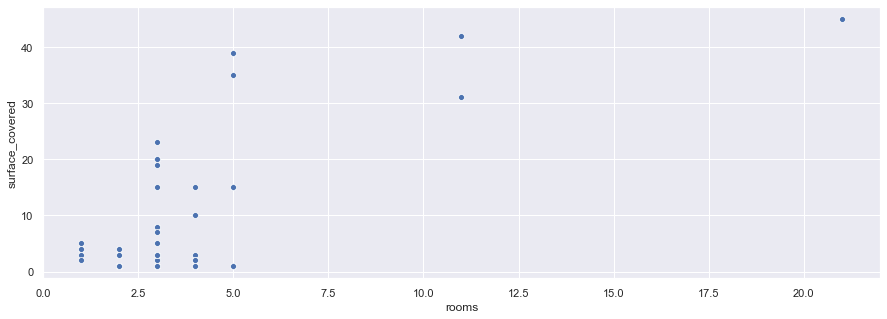

In [29]:
sns.scatterplot(x=errores_rooms.rooms,y=data2['surface_covered'])

Text(0.5, 1.0, 'Cantidad de propiedades que presentan error en su surface covered')

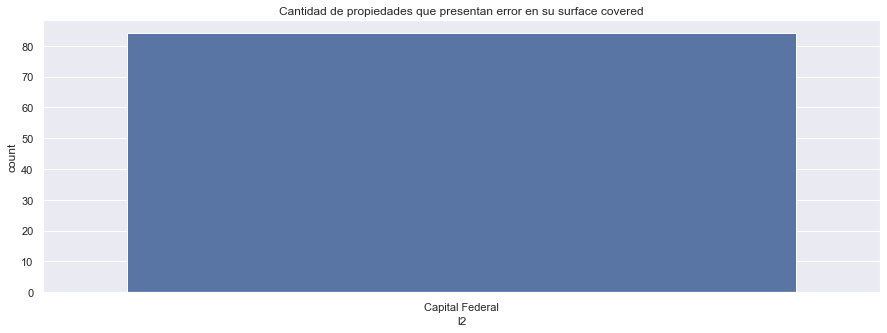

In [30]:
sns.countplot(errores_rooms['l2'],
              order = errores_rooms['l2'].value_counts().index).set_title("Cantidad de propiedades que presentan error en su surface covered")

Text(0.5, 1.0, 'Cantidad de propiedades por tipo de propiedad que presentan error en su surface covered')

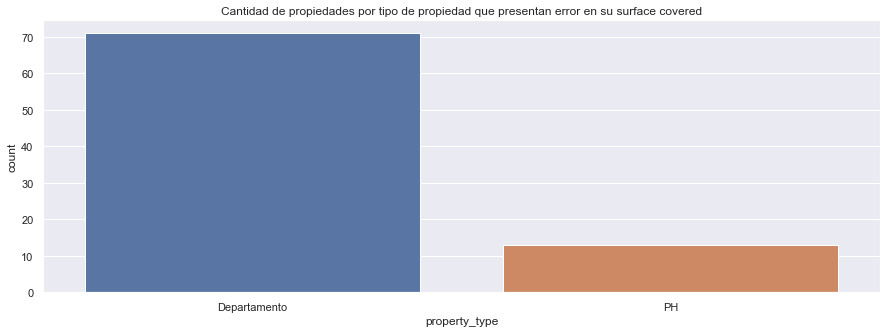

In [31]:
sns.countplot(errores_rooms['property_type'],
              order = errores_rooms['property_type'].value_counts().index).set_title("Cantidad de propiedades por tipo de propiedad que presentan error en su surface covered")

In [32]:
# cambiar los valores del surface covered para las propiedades que tienen una superficie menor que lo que deberia tener de acuerdo a sus rooms. Cambiar el valor por la media 
# del surface de ese numero de habitaciones del dataset original filtrado por IQR
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 
rooms=np.arange(1,36)
for room in rooms:
    try:
        errores_rooms.loc[(errores_rooms['rooms'] == room), ['surface_covered']] = mean_surface_by_rooms[room]
#         errores_rooms.loc[(errores_rooms['surface_covered']>errores_rooms['surface_total']), ['surface_covered']] = errores_rooms['surface_total']
    except:
        pass

errores_rooms

C:\Users\PERSONAL\anaconda3\envs\data_science\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\PERSONAL\anaconda3\envs\data_science\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\PERSONAL\anaconda3\envs\data_science\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1321,-34.560811,-58.463965,Capital Federal,Belgrano,1.0,1.0,1.0,33.0,34.848922,115000.0,Departamento
2506,NaN,NaN,Capital Federal,Palermo,3.0,2.0,1.0,NaN,70.292013,236000.0,Departamento
2816,-34.591349,-58.393495,Capital Federal,Recoleta,4.0,3.0,3.0,182.0,104.348101,950000.0,Departamento
4608,-34.572512,-58.478717,Capital Federal,Villa Urquiza,5.0,4.0,5.0,NaN,126.175618,598000.0,Departamento
5386,-34.638088,-58.375796,Capital Federal,Barracas,3.0,2.0,2.0,71.0,70.292013,210000.0,Departamento
...,...,...,...,...,...,...,...,...,...,...,...
135161,-34.585834,-58.475389,Capital Federal,Villa Urquiza,2.0,1.0,1.0,NaN,44.840006,155000.0,Departamento
135162,-34.576426,-58.489780,Capital Federal,Villa Urquiza,4.0,3.0,2.0,NaN,104.348101,295000.0,Departamento
135163,-34.571778,-58.480201,Capital Federal,Villa Urquiza,2.0,1.0,1.0,NaN,44.840006,129900.0,Departamento
135190,-34.591976,-58.396064,Capital Federal,Barrio Norte,5.0,4.0,3.0,255.0,126.175618,575000.0,Departamento


In [33]:
errores_rooms.round({'surface_covered': 1})

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1321,-34.560811,-58.463965,Capital Federal,Belgrano,1.0,1.0,1.0,33.0,34.8,115000.0,Departamento
2506,NaN,NaN,Capital Federal,Palermo,3.0,2.0,1.0,NaN,70.3,236000.0,Departamento
2816,-34.591349,-58.393495,Capital Federal,Recoleta,4.0,3.0,3.0,182.0,104.3,950000.0,Departamento
4608,-34.572512,-58.478717,Capital Federal,Villa Urquiza,5.0,4.0,5.0,NaN,126.2,598000.0,Departamento
5386,-34.638088,-58.375796,Capital Federal,Barracas,3.0,2.0,2.0,71.0,70.3,210000.0,Departamento
...,...,...,...,...,...,...,...,...,...,...,...
135161,-34.585834,-58.475389,Capital Federal,Villa Urquiza,2.0,1.0,1.0,NaN,44.8,155000.0,Departamento
135162,-34.576426,-58.489780,Capital Federal,Villa Urquiza,4.0,3.0,2.0,NaN,104.3,295000.0,Departamento
135163,-34.571778,-58.480201,Capital Federal,Villa Urquiza,2.0,1.0,1.0,NaN,44.8,129900.0,Departamento
135190,-34.591976,-58.396064,Capital Federal,Barrio Norte,5.0,4.0,3.0,255.0,126.2,575000.0,Departamento


In [34]:
errores_rooms.loc[(errores_rooms['surface_covered']>errores_rooms['surface_total']), ['surface_covered']] = errores_rooms['surface_total']


C:\Users\PERSONAL\anaconda3\envs\data_science\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [35]:
# Join errors_room fixed df with the original dataframe 
data2['surface_covered'] = data2.index.map(errores_rooms.set_index(errores_rooms.index)['surface_covered'])

In [36]:
errores_rooms

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1321,-34.560811,-58.463965,Capital Federal,Belgrano,1.0,1.0,1.0,33.0,33.000000,115000.0,Departamento
2506,NaN,NaN,Capital Federal,Palermo,3.0,2.0,1.0,NaN,70.292013,236000.0,Departamento
2816,-34.591349,-58.393495,Capital Federal,Recoleta,4.0,3.0,3.0,182.0,104.348101,950000.0,Departamento
4608,-34.572512,-58.478717,Capital Federal,Villa Urquiza,5.0,4.0,5.0,NaN,126.175618,598000.0,Departamento
5386,-34.638088,-58.375796,Capital Federal,Barracas,3.0,2.0,2.0,71.0,70.292013,210000.0,Departamento
...,...,...,...,...,...,...,...,...,...,...,...
135161,-34.585834,-58.475389,Capital Federal,Villa Urquiza,2.0,1.0,1.0,NaN,44.840006,155000.0,Departamento
135162,-34.576426,-58.489780,Capital Federal,Villa Urquiza,4.0,3.0,2.0,NaN,104.348101,295000.0,Departamento
135163,-34.571778,-58.480201,Capital Federal,Villa Urquiza,2.0,1.0,1.0,NaN,44.840006,129900.0,Departamento
135190,-34.591976,-58.396064,Capital Federal,Barrio Norte,5.0,4.0,3.0,255.0,126.175618,575000.0,Departamento


In [39]:
data2['surface_covered'].fillna(data1['surface_covered'],inplace=True)

In [40]:
data2

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,-34.593779,-58.441239,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...,...,...,...
146554,-34.585355,-58.427194,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,-34.585355,-58.427194,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,-34.584134,-58.436389,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,-34.583995,-58.417645,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


In [41]:
errores_rooms2=data2[data2["surface_covered"]<data2["rooms"]*8]
errores_rooms2

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
12222,-34.595282,-58.378013,Capital Federal,Retiro,11.0,1.0,1.0,48.0,48.0,245000.0,Departamento
27473,-34.596052,-58.427724,Capital Federal,Palermo,5.0,4.0,NaN,39.0,39.0,134390.0,Departamento
42577,-34.594200,-58.403800,Capital Federal,Recoleta,21.0,1.0,1.0,53.0,45.0,135000.0,Departamento
63052,-34.582500,-58.406700,Capital Federal,Palermo,11.0,1.0,1.0,31.0,31.0,138000.0,Departamento
82317,-34.596052,-58.427724,Capital Federal,Palermo,5.0,4.0,NaN,39.0,39.0,134390.0,Departamento


In [42]:
np.warnings.filterwarnings('ignore') 
errores_rooms2.loc[errores_rooms2['rooms'] == 11.0, ['rooms']] = 1
errores_rooms2.loc[errores_rooms2['rooms'] == 21.0, ['rooms']] = 1

In [43]:
data2['rooms'] = data2.index.map(errores_rooms2.set_index(errores_rooms2.index)['rooms'])
data2['rooms'].fillna(data1['rooms'],inplace=True)

In [44]:
data2

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,-34.624056,-58.412110,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,-34.581294,-58.436754,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,-34.593779,-58.441239,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...,...,...,...
146554,-34.585355,-58.427194,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,-34.585355,-58.427194,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,-34.584134,-58.436389,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,-34.583995,-58.417645,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


In [45]:
errores_rooms2=data2[data2["surface_covered"]<data2["rooms"]*8]
errores_rooms2

,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
27473,-34.596052,-58.427724,Capital Federal,Palermo,5.0,4.0,NaN,39.0,39.0,134390.0,Departamento
82317,-34.596052,-58.427724,Capital Federal,Palermo,5.0,4.0,NaN,39.0,39.0,134390.0,Departamento


In [46]:
data2.isnull().sum()

lat                4534
lon                4548
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
property_type         0
dtype: int64

Text(0.5, 1.0, 'heatmap of missing values per column ')

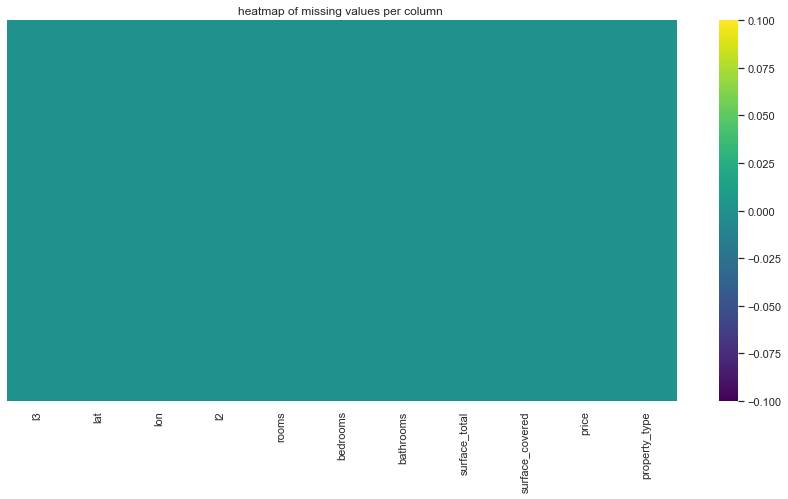

In [124]:
# heatmap of missing values per column 
fig, ax = plt.subplots(figsize=(15,7))
ax=sns.heatmap(data2.isnull(), yticklabels=False,cmap='viridis')
ax.set_title("heatmap of missing values per column ")

In [48]:
data2.isnull().sum()/len(data2)*100

lat                 4.956004
lon                 4.971307
l2                  0.000000
l3                  0.000000
rooms               0.000000
bedrooms            0.000000
bathrooms           2.373067
surface_total       9.746953
surface_covered    10.094551
price               0.000000
property_type       0.000000
dtype: float64

In [49]:
# fill lat column with the mean of the location of the l3
means = data2.groupby(['l3'])['lat'].mean()
data2 = data2.set_index(['l3'])
data2['lat'] = data2['lat'].fillna(means)
data2 = data2.reset_index()

In [50]:
# fill lon column with the mean of the location of the l3

data2["lon"].fillna(data2.groupby("l3")["lon"].transform("mean"), inplace=True)

In [51]:
data2.isnull().sum()/len(data2)*100

l3                  0.000000
lat                 0.000000
lon                 0.000000
l2                  0.000000
rooms               0.000000
bedrooms            0.000000
bathrooms           2.373067
surface_total       9.746953
surface_covered    10.094551
price               0.000000
property_type       0.000000
dtype: float64

In [52]:
data2['l3'].value_counts()

Palermo                 13007
Almagro                  7498
Belgrano                 6876
Caballito                6610
Villa Crespo             6429
Recoleta                 5869
Villa Urquiza            3325
Barrio Norte             3198
Balvanera                2941
Flores                   2535
Nuñez                    1966
Puerto Madero            1746
Colegiales               1582
San Cristobal            1520
Villa Devoto             1416
Villa del Parque         1346
Parque Centenario        1315
Saavedra                 1110
Liniers                  1042
Paternal                 1040
San Telmo                1024
Floresta                  935
Villa Luro                926
Boedo                     915
Monserrat                 823
Parque Chacabuco          822
Retiro                    819
San Nicolás               810
Las Cañitas               788
Once                      774
Barracas                  749
Chacarita                 743
Mataderos                 735
Villa Puey

## Fill missing values of the following columns with the mean value of other columns in the dataset 

In [53]:
data2['surface_covered'].fillna(data2['surface_total'],inplace=True)

In [54]:
data2["surface_covered"].fillna(data2.groupby("rooms")["surface_covered"].transform("mean"), inplace=True)

In [55]:
data2["surface_total"].fillna(data2.groupby("rooms")["surface_total"].transform("mean"), inplace=True)

In [56]:
data2["bathrooms"].fillna(data2.groupby("rooms")["bathrooms"].transform("mean"), inplace=True)

<AxesSubplot:>

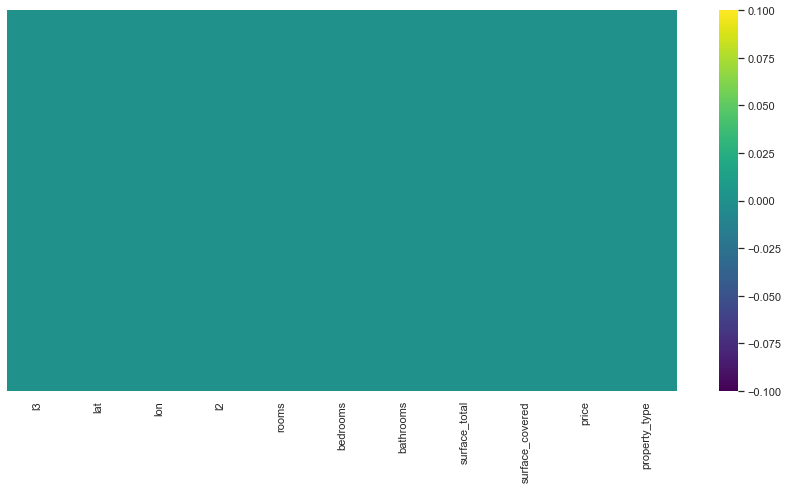

In [57]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data2.isnull(), yticklabels=False,cmap='viridis')

In [58]:
data2['l3'].value_counts()

Palermo                 13007
Almagro                  7498
Belgrano                 6876
Caballito                6610
Villa Crespo             6429
Recoleta                 5869
Villa Urquiza            3325
Barrio Norte             3198
Balvanera                2941
Flores                   2535
Nuñez                    1966
Puerto Madero            1746
Colegiales               1582
San Cristobal            1520
Villa Devoto             1416
Villa del Parque         1346
Parque Centenario        1315
Saavedra                 1110
Liniers                  1042
Paternal                 1040
San Telmo                1024
Floresta                  935
Villa Luro                926
Boedo                     915
Monserrat                 823
Parque Chacabuco          822
Retiro                    819
San Nicolás               810
Las Cañitas               788
Once                      774
Barracas                  749
Chacarita                 743
Mataderos                 735
Villa Puey

## Calculate the IQR of the following columns and filter the data set according to it

In [59]:
data2=calculate_IQR(data2,"surface_covered")

In [60]:
data2=calculate_IQR(data2,"surface_total")

In [61]:
data2=calculate_IQR(data2,"bedrooms")
data2=calculate_IQR(data2,"bathrooms")

In [62]:
data2=calculate_IQR(data2,"rooms")

In [63]:
data2=calculate_IQR(data2,"price")

In [64]:
data2.shape

(73816, 11)

In [65]:
data2['l2'].value_counts()

Capital Federal    73816
Name: l2, dtype: int64

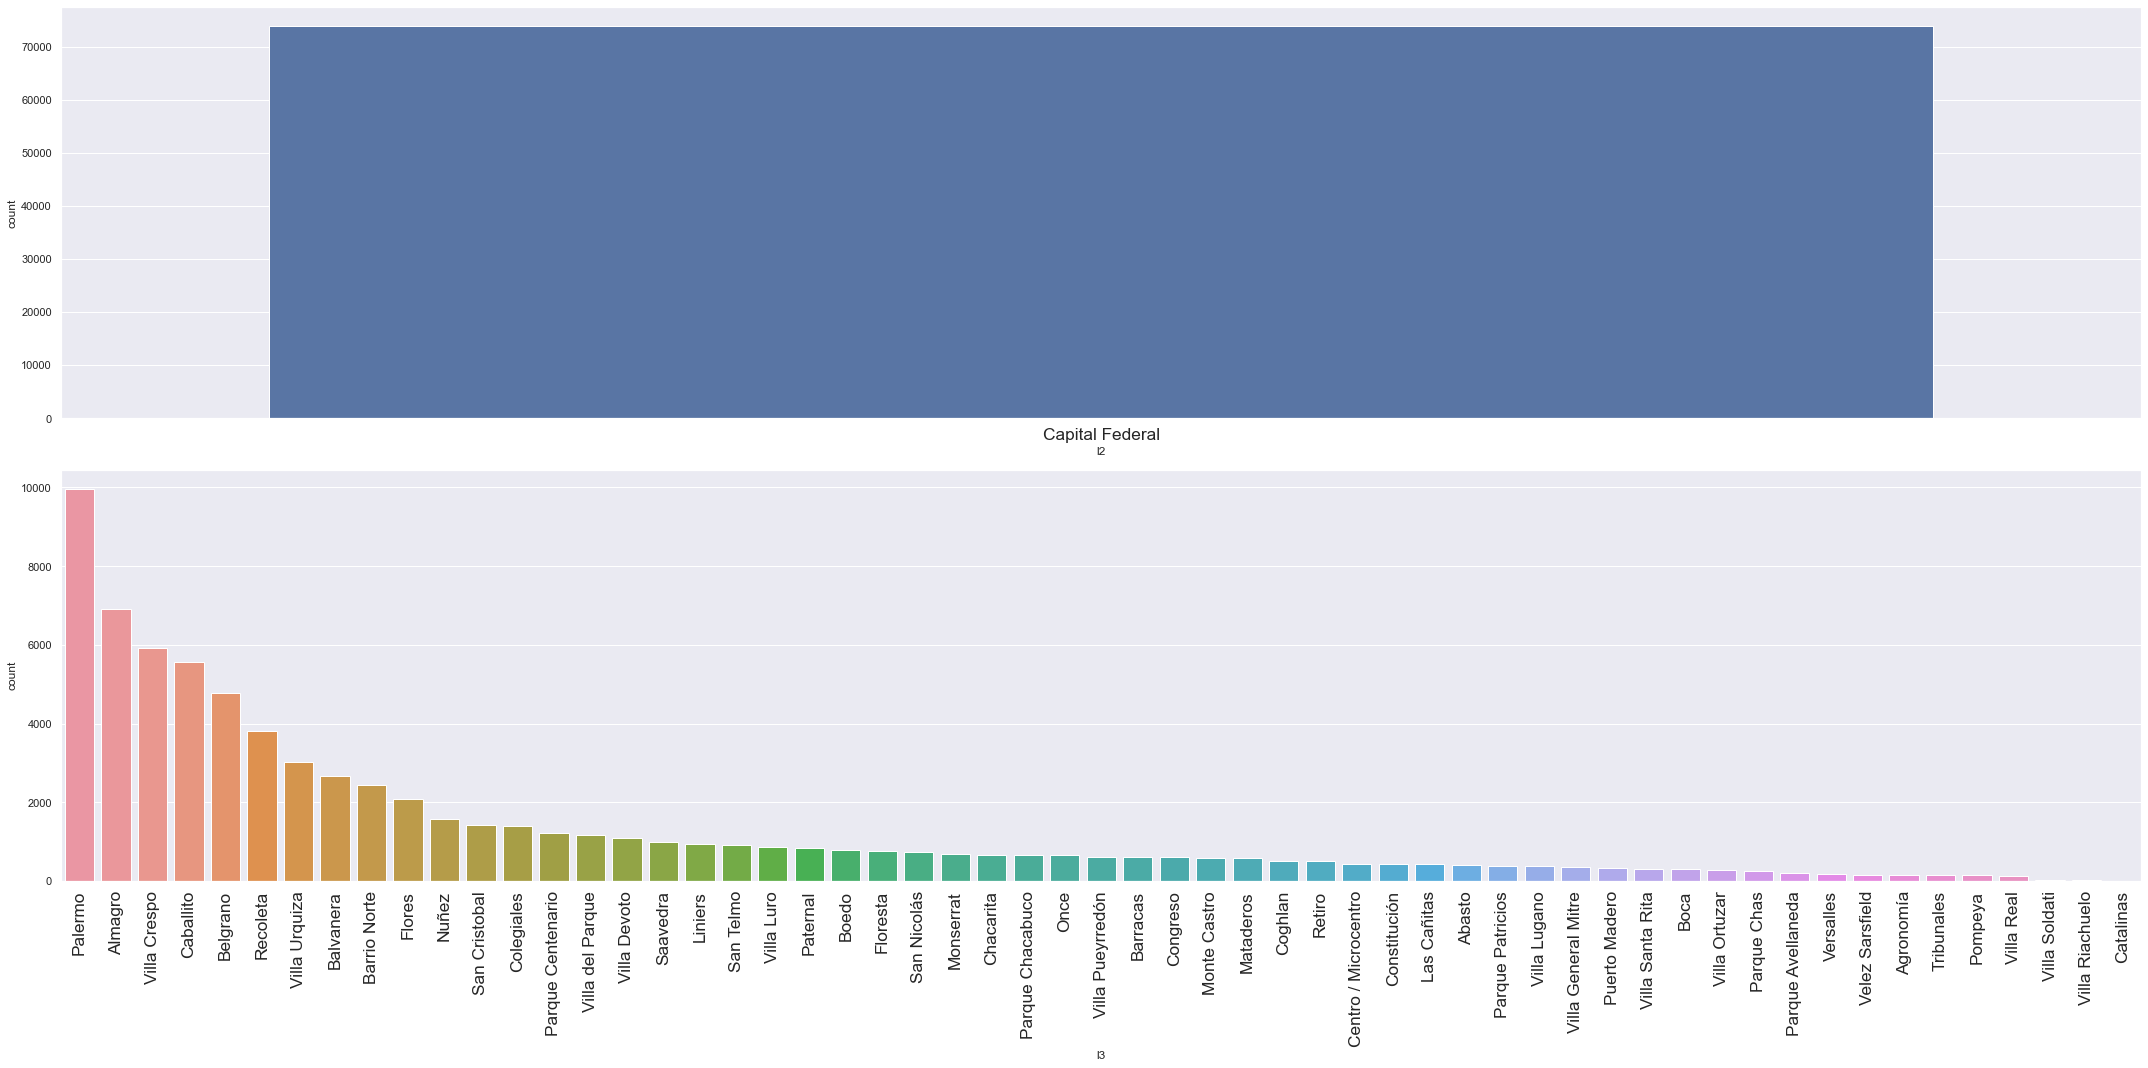

In [66]:
plt.figure(figsize = (10*3,15))
l2=data2['l2']
l3=data2['l3']
plt.subplot(2,1,1)
ap=sns.countplot(l2)
ap.set_xticklabels(ap.get_xticklabels(), fontsize='x-large')

plt.subplot(2,1,2)
ax=sns.countplot(l3, order=l3.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize='x-large')

plt.tight_layout()
plt.show()

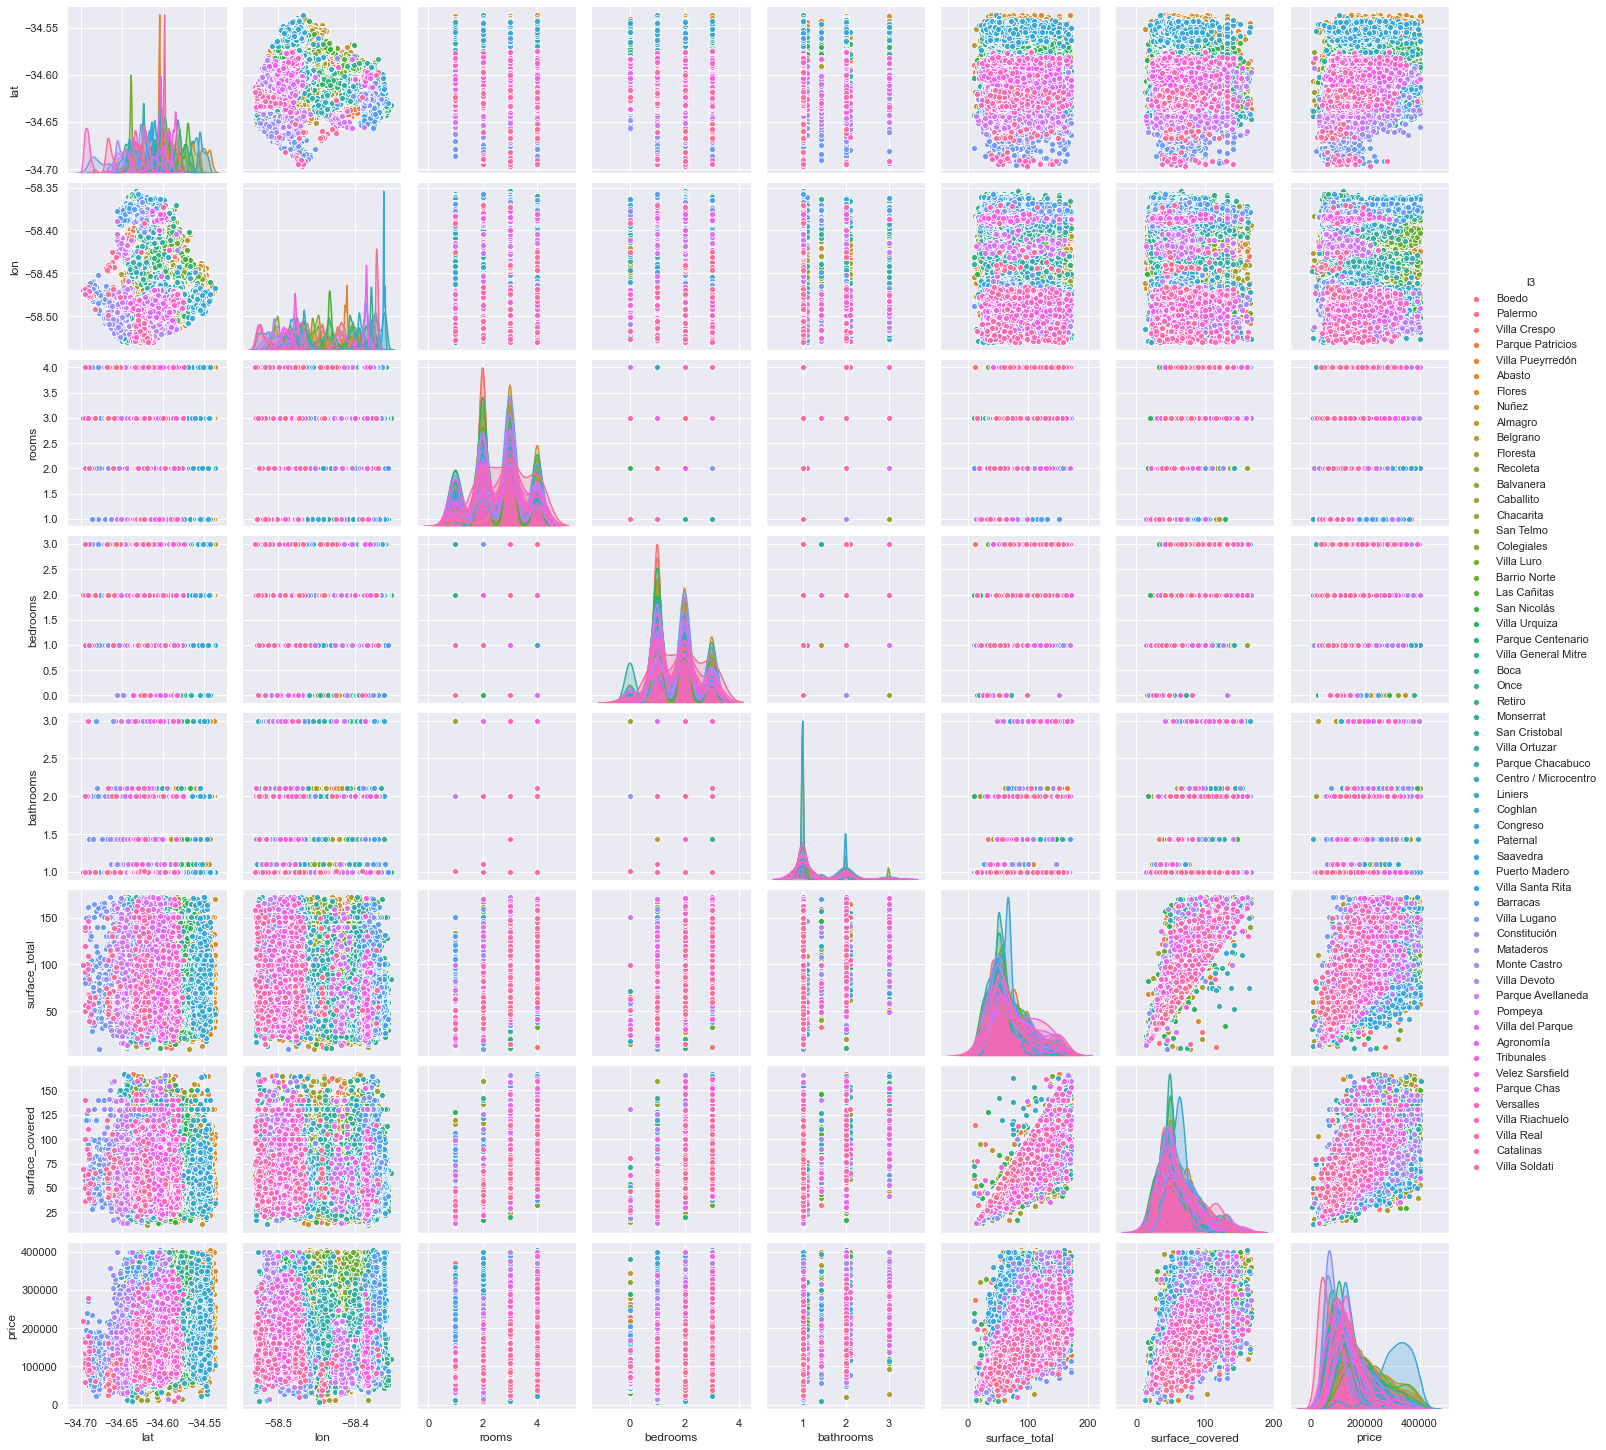

In [67]:
sns.pairplot(data=data2,hue='l3')

In [68]:
m2_price=data2.groupby('l3')['price'].mean()/data2.groupby('l3')['surface_total'].mean()
# m2_price=m2_price.to_frame()
m2 = pd.DataFrame({'l3':m2_price.index, 'm2_price':m2_price.values})
m2.head()

,l3,m2_price
0,Abasto,2383.341294
1,Agronomía,2116.180953
2,Almagro,2335.594767
3,Balvanera,1930.508672
4,Barracas,2253.556705


In [69]:
errores_rooms3=data2[data2["surface_total"]<data2["surface_covered"]]
errores_rooms3                    

,l3,lat,lon,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
590,Belgrano,-34.561805,-58.459579,Capital Federal,3.0,2.0,1.0,43.0,44.0,133000.0,Departamento
635,Villa Pueyrredón,-34.584201,-58.496345,Capital Federal,3.0,2.0,1.0,65.0,66.0,187000.0,Departamento
869,Recoleta,-34.576322,-58.406275,Capital Federal,2.0,1.0,2.0,44.0,45.0,235000.0,Departamento
942,Congreso,-34.610787,-58.393919,Capital Federal,3.0,2.0,1.0,78.0,79.0,235000.0,Departamento
1126,Flores,-34.630626,-58.464626,Capital Federal,3.0,2.0,1.0,83.0,84.0,145000.0,Departamento
...,...,...,...,...,...,...,...,...,...,...,...
84150,Balvanera,-34.610544,-58.401866,Capital Federal,3.0,2.0,2.0,75.0,76.0,110000.0,Departamento
88151,Agronomía,-34.592064,-58.491718,Capital Federal,4.0,2.0,2.0,55.0,72.0,175000.0,Casa
90843,Caballito,-34.626300,-58.452418,Capital Federal,1.0,1.0,1.0,24.0,25.0,54900.0,Departamento
90848,San Nicolás,-34.605086,-58.384630,Capital Federal,1.0,1.0,1.0,21.0,22.0,48000.0,Departamento


In [70]:
data2.loc[(data2['surface_covered']>data2['surface_total']), ['surface_covered']] = data2['surface_total']


In [71]:
# data2.price.groupby([data2['l3']]).mean().reset_index(name='price_mean')
# data.V2.isnull().groupby([data['V1']]).sum().astype(int).reset_index(name='count')

In [72]:
data3=data2.copy()

In [73]:
data3=pd.merge(data2,m2, on='l3')
data3.head()

,l3,lat,lon,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,m2_price
0,Boedo,-34.624056,-58.412110,Capital Federal,2.0,1.0,2.0,70.0,58.0,159000.0,PH,1965.634117
1,Boedo,-34.603683,-58.381557,Capital Federal,2.0,1.0,1.0,68.0,59.0,149000.0,Departamento,1965.634117
2,Boedo,-34.630349,-58.417223,Capital Federal,2.0,1.0,1.0,50.0,44.0,115000.0,Departamento,1965.634117
3,Boedo,-34.627863,-58.423119,Capital Federal,1.0,1.0,1.0,48.0,48.0,115000.0,Departamento,1965.634117
4,Boedo,-34.624263,-58.422702,Capital Federal,2.0,1.0,1.0,53.0,53.0,97500.0,Departamento,1965.634117


In [74]:
# Round m2 price column data to one decimal

data3.round({'m2_price': 1})

,l3,lat,lon,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,m2_price
0,Boedo,-34.624056,-58.412110,Capital Federal,2.0,1.0,2.0,70.0,58.0,159000.0,PH,1965.6
1,Boedo,-34.603683,-58.381557,Capital Federal,2.0,1.0,1.0,68.0,59.0,149000.0,Departamento,1965.6
2,Boedo,-34.630349,-58.417223,Capital Federal,2.0,1.0,1.0,50.0,44.0,115000.0,Departamento,1965.6
3,Boedo,-34.627863,-58.423119,Capital Federal,1.0,1.0,1.0,48.0,48.0,115000.0,Departamento,1965.6
4,Boedo,-34.624263,-58.422702,Capital Federal,2.0,1.0,1.0,53.0,53.0,97500.0,Departamento,1965.6
...,...,...,...,...,...,...,...,...,...,...,...,...
73811,Villa Soldati,-34.667041,-58.440856,Capital Federal,3.0,2.0,1.0,47.0,41.0,55000.0,Departamento,934.6
73812,Villa Soldati,-34.657062,-58.430449,Capital Federal,4.0,3.0,2.0,97.0,49.0,110000.0,PH,934.6
73813,Villa Soldati,-34.665461,-58.442890,Capital Federal,4.0,3.0,1.0,70.0,65.0,39000.0,Departamento,934.6
73814,Villa Soldati,-34.681997,-58.491044,Capital Federal,3.0,2.0,1.0,65.0,65.0,62000.0,Departamento,934.6


[Text(0, 0, 'Boedo'),
 Text(1, 0, 'Palermo'),
 Text(2, 0, 'Villa Crespo'),
 Text(3, 0, 'Parque Patricios'),
 Text(4, 0, 'Villa Pueyrredón'),
 Text(5, 0, 'Abasto'),
 Text(6, 0, 'Flores'),
 Text(7, 0, 'Nuñez'),
 Text(8, 0, 'Almagro'),
 Text(9, 0, 'Belgrano'),
 Text(10, 0, 'Floresta'),
 Text(11, 0, 'Recoleta'),
 Text(12, 0, 'Balvanera'),
 Text(13, 0, 'Caballito'),
 Text(14, 0, 'Chacarita'),
 Text(15, 0, 'San Telmo'),
 Text(16, 0, 'Colegiales'),
 Text(17, 0, 'Villa Luro'),
 Text(18, 0, 'Barrio Norte'),
 Text(19, 0, 'Las Cañitas'),
 Text(20, 0, 'San Nicolás'),
 Text(21, 0, 'Villa Urquiza'),
 Text(22, 0, 'Parque Centenario'),
 Text(23, 0, 'Villa General Mitre'),
 Text(24, 0, 'Boca'),
 Text(25, 0, 'Once'),
 Text(26, 0, 'Retiro'),
 Text(27, 0, 'Monserrat'),
 Text(28, 0, 'San Cristobal'),
 Text(29, 0, 'Villa Ortuzar'),
 Text(30, 0, 'Parque Chacabuco'),
 Text(31, 0, 'Centro / Microcentro'),
 Text(32, 0, 'Liniers'),
 Text(33, 0, 'Coghlan'),
 Text(34, 0, 'Congreso'),
 Text(35, 0, 'Paternal'),
 Tex

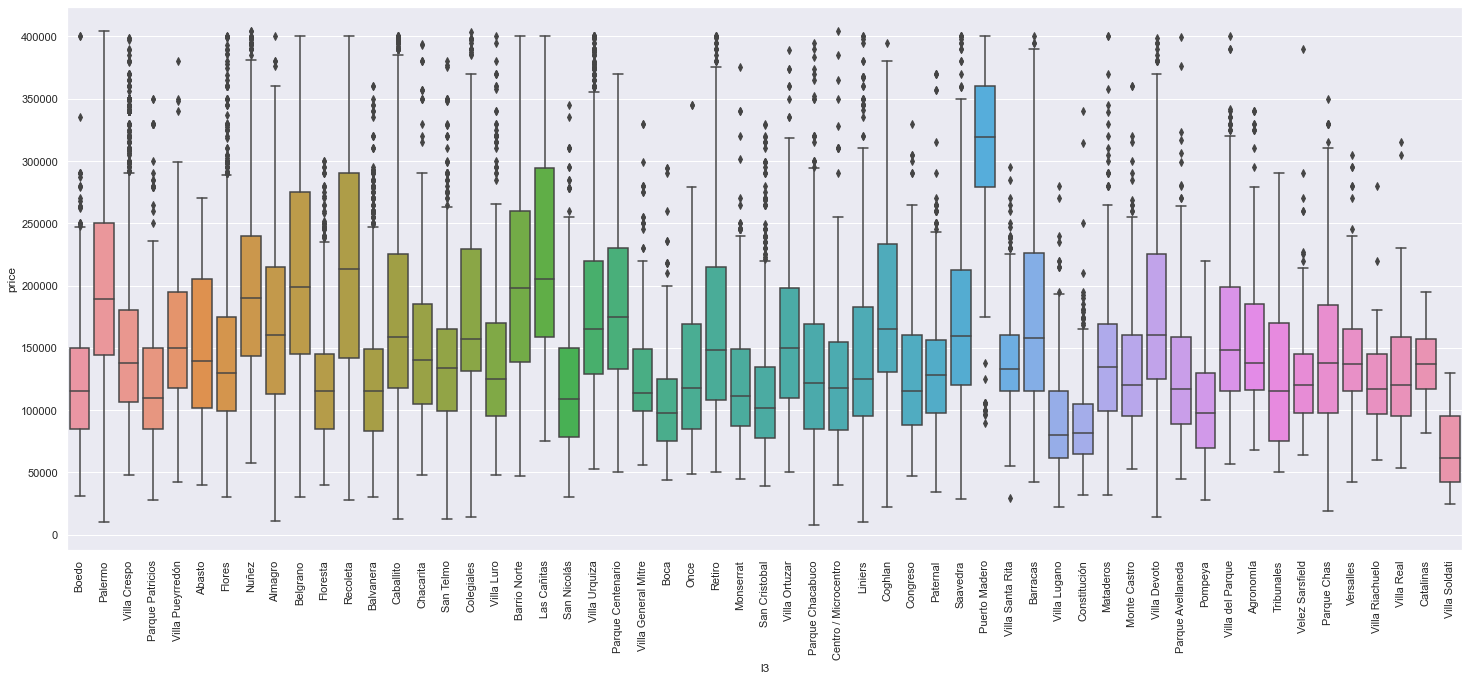

In [75]:
# set size of seaborn plot
sns.set(rc={'figure.figsize':(25,10)})
ax=sns.boxplot(x='l3', y='price', data=data3)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

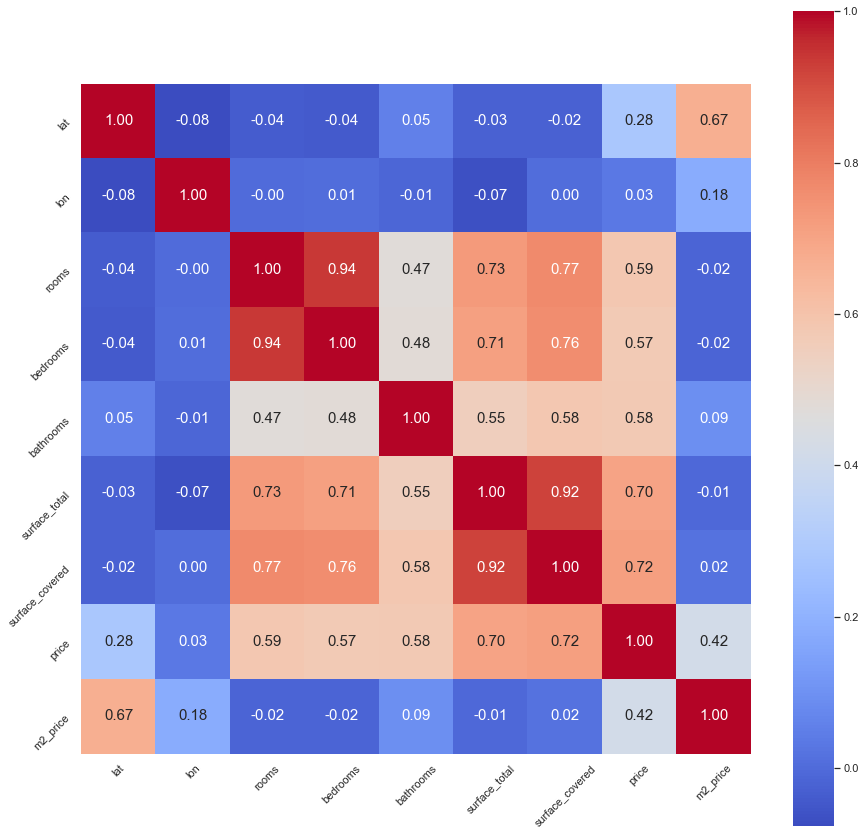

In [76]:
corr = data3.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [77]:
data3['bedrooms'].astype("int8")
data3['surface_covered'].astype("int32")
data3['m2_price'].astype("int32")

0        1965
1        1965
2        1965
3        1965
4        1965
         ... 
73811     934
73812     934
73813     934
73814     934
73815     934
Name: m2_price, Length: 73816, dtype: int32

# Modelos Machine Learning

In [78]:
X = data3[['bedrooms','surface_covered', 'm2_price']] 
y = data3['price']

In [79]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X = scl.fit_transform(X)
X

array([[-0.82946774, -0.12017552, -1.0835801 ],
       [-0.82946774, -0.07992537, -1.0835801 ],
       [-0.82946774, -0.68367767, -1.0835801 ],
       ...,
       [ 1.73925146,  0.16157555, -3.24888476],
       [ 0.45489186,  0.16157555, -3.24888476],
       [ 1.73925146,  2.375334  , -3.24888476]])

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [81]:
knn = KNeighborsRegressor()

In [82]:
# Grilla para Grid Search
param_grid = {'n_neighbors':np.arange(1, 30),
              'weights': ['uniform', 'distance'], 
              'leaf_size':[1,3,5,7,10],
              'algorithm':['auto', 'kd_tree']}

In [83]:
# ESTRATEGIA 1: Grid Search
model = GridSearchCV(knn, param_grid=param_grid, cv=5)

# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5, 7, 10],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['uniform', 'distance']})

In [84]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores parametros: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 29, 'weights': 'distance'}
Mejor Score: 0.7568112768161397



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.184255,0.005905,0.186708,0.015219,auto,1,1,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.546315,0.557266,0.576944,0.571666,0.562558,0.562950,0.010780,561
1,0.181920,0.003380,0.182932,0.008822,auto,1,1,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.546315,0.557266,0.576944,0.571666,0.562558,0.562950,0.010780,561
2,0.179045,0.001893,0.194439,0.003719,auto,1,2,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.654721,0.660238,0.671074,0.677015,0.676975,0.668005,0.009032,545
3,0.178865,0.001824,0.195231,0.002306,auto,1,2,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.652800,0.658955,0.668070,0.673599,0.675365,0.665758,0.008641,555
4,0.180439,0.003549,0.213450,0.008478,auto,1,3,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.694828,0.696147,0.702679,0.707941,0.701995,0.700718,0.004759,533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,0.163237,0.002401,0.189843,0.007706,kd_tree,10,27,distance,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.751223,0.755359,0.761221,0.753875,0.761339,0.756603,0.004042,23
576,0.163036,0.002191,0.201646,0.012341,kd_tree,10,28,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.739413,0.739975,0.750354,0.747399,0.750260,0.745480,0.004845,389
577,0.162033,0.002101,0.202648,0.003006,kd_tree,10,28,distance,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.751519,0.755399,0.761228,0.753618,0.761750,0.756703,0.004100,9
578,0.164037,0.002281,0.206248,0.003061,kd_tree,10,29,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.738572,0.739840,0.750227,0.747158,0.749548,0.745069,0.004911,401


In [164]:
knn_regressor = KNeighborsRegressor(n_neighbors=19,algorithm='auto', leaf_size=10,weights='distance')

In [165]:
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(leaf_size=10, n_neighbors=19, weights='distance')

In [166]:
y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)

In [167]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train en K neighbors: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test en K neighbors: {rmse_test}')

Raíz del error cuadrático medio en Train en K neighbors: 33401.98660111623
Raíz del error cuadrático medio en Test en K neighbors: 37502.67599330429


In [89]:
from sklearn.preprocessing import PolynomialFeatures

In [90]:
poly = PolynomialFeatures(3, include_bias=False)
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)
print(X_train_new.shape, X_test_new.shape)

(59052, 19) (14764, 19)


In [91]:
reg_2 = LinearRegression()
reg_2.fit(X_train_new, y_train)
print(reg_2.coef_, reg_2.intercept_)
y_train_pred_2 = reg_2.predict(X_train_new)
y_test_pred_2 = reg_2.predict(X_test_new)

[ 7.46411735e+02  6.39626781e+04  3.58573673e+04 -5.39991382e+03
  5.77820992e+03 -3.91289680e+03 -8.15613739e+03  1.55260552e+04
 -2.21179336e+02  1.98481669e+03 -1.28540689e+03 -1.39511980e+03
 -2.50676692e+02 -1.20675905e+01 -1.74273185e+03 -2.28185442e+02
 -2.75952674e+03 -6.20679154e+02 -4.58784829e+02] 180484.99443857739


In [92]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_2))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_2))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 41507.79060231203
Raíz del error cuadrático medio en Test: 40940.97849629406


In [93]:
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [0])], 
                                      remainder='passthrough') 

In [94]:
x=data3[['l3','bedrooms','surface_covered','m2_price','rooms','bathrooms','surface_total']]
# country=np.array(df1.country).reshape(-1,1)
# x.loc[:,'country']=labelencoder.fit_transform(x.iloc[:,1])
x = columnTransformer.fit_transform(x).toarray()

In [168]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
x = pca.fit_transform(x) 

In [96]:
x_train, x_test, Y_train, Y_test = train_test_split(
    x, y, test_size=0.30, random_state=42)

print(x_train.shape, Y_train.shape, x_test.shape, Y_test.shape)

(51671, 4) (51671,) (22145, 4) (22145,)


# Modelo con los datos transformados

In [97]:
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,5,7,9,11,15,20,30]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors= k)
    
    # Entrenar el modelo
    clf.fit(x_train,Y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(x_train)
    train_acc = metrics.mean_absolute_error(Y_train,y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(x_test)
    test_acc = metrics.mean_absolute_error(Y_test,y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

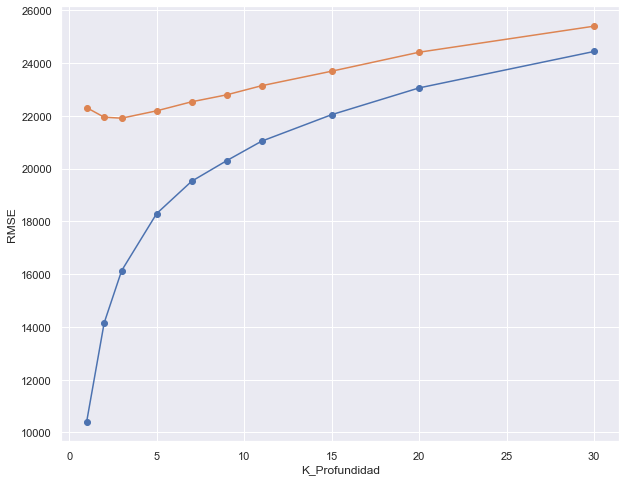

In [98]:
fig= plt.figure(figsize=(10,8))
plt.plot(k_vecinos, lista_accuracy_train, 'o-',label='train' )
plt.plot(k_vecinos, lista_accuracy_test,'o-',label='test')
plt.xlabel("K_Profundidad")
plt.ylabel("RMSE")
plt.show()

In [99]:
pca.explained_variance_ratio_

array([9.93400150e-01, 6.35007309e-03, 2.42531747e-04, 2.34943623e-06])

In [100]:
# ESTRATEGIA 1: Grid Search
model = GridSearchCV(knn, param_grid=param_grid, cv=5)

# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(x_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5, 7, 10],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['uniform', 'distance']})

In [101]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores parametros: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 29, 'weights': 'distance'}
Mejor Score: 0.8323591063731415



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.083218,0.001467,0.046810,0.001167,auto,1,1,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.731472,0.736125,0.722699,0.726587,0.733460,0.730069,0.004829,577
1,0.083624,0.001858,0.046003,0.000010,auto,1,1,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.731472,0.736125,0.722699,0.726587,0.733460,0.730069,0.004829,577
2,0.083819,0.001470,0.056415,0.000804,auto,1,2,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.766516,0.780435,0.772920,0.776259,0.779348,0.775096,0.005026,489
3,0.082979,0.001197,0.057004,0.000632,auto,1,2,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.773764,0.786791,0.773417,0.782758,0.786749,0.780696,0.005984,429
4,0.083020,0.001539,0.065616,0.000485,auto,1,3,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.781022,0.791705,0.787891,0.787616,0.788626,0.787372,0.003493,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,0.063410,0.001025,0.093024,0.001902,kd_tree,10,27,distance,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.826175,0.839319,0.828579,0.828013,0.837850,0.831987,0.005465,21
576,0.064011,0.001421,0.092821,0.001829,kd_tree,10,28,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.764307,0.778100,0.772380,0.765269,0.772361,0.770484,0.005108,541
577,0.063224,0.001162,0.094612,0.001198,kd_tree,10,28,distance,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.826371,0.839444,0.828777,0.828144,0.838128,0.832173,0.005473,13
578,0.063620,0.001202,0.094416,0.002423,kd_tree,10,29,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.763296,0.777334,0.771903,0.764206,0.771508,0.769649,0.005246,555


In [102]:
knn_regressor2 = KNeighborsRegressor(n_neighbors=29,algorithm='auto', leaf_size=7,weights='distance')

In [103]:
knn_regressor2.fit(x_train, Y_train)

KNeighborsRegressor(leaf_size=7, n_neighbors=29, weights='distance')

In [104]:
y_train_pred = knn_regressor2.predict(x_train)
y_test_pred = knn_regressor2.predict(x_test)

In [105]:
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 17778.06211859554
Raíz del error cuadrático medio en Test: 30740.987579517343


# Random Forest y Bagging 

In [106]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

In [107]:
bag = BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=5,algorithm='auto', leaf_size=10,weights='distance'), n_estimators= 10, n_jobs = -1)
bag.fit(x_train, Y_train)
y_train_pred = bag.predict(x_train)
y_test_pred = bag.predict(x_test)

In [108]:
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 20374.16860954687
Raíz del error cuadrático medio en Test: 31769.946835380313


In [153]:
regr = RandomForestRegressor(max_depth=50, random_state=0)

In [154]:
regr.fit(x_train, Y_train)

RandomForestRegressor(max_depth=50, random_state=0)

In [155]:
y_train_pred = regr.predict(x_train)
y_test_pred = regr.predict(x_test)

In [175]:
from matplotlib import pyplot


Feature: 0, Score: 0.25181
Feature: 1, Score: 0.62781
Feature: 2, Score: 0.05836
Feature: 3, Score: 0.06202


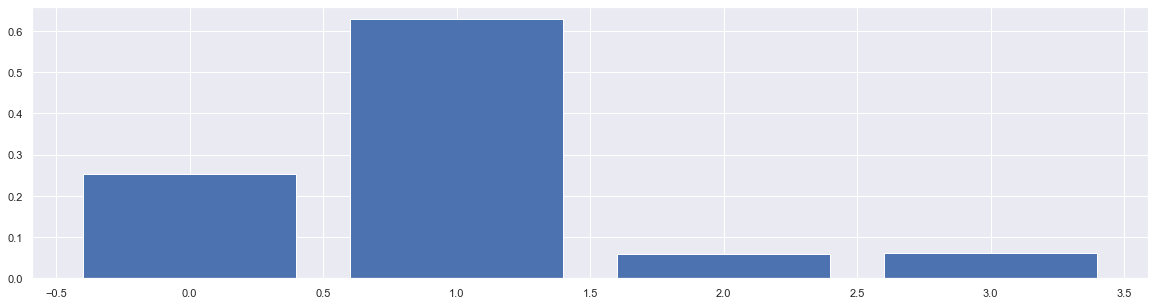

In [176]:
# summarize feature importance
importance=regr.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Ya que a las variables se les aplicó una reduccion de dimensiones PCA, en estas 4 dimensiones se expresa la importancia de las 7 iniciales. Es notorio que la segunda dimension tiene una gran importancia sobre la prediccion, mientras que la 3ra y 4ta no tanto 

In [157]:
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train con random forest: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test con random forest: {rmse_test}')

Raíz del error cuadrático medio en Train con random forest: 19489.823642647756
Raíz del error cuadrático medio en Test con random forest: 30500.040303220292


Modelo: Vecinos mas cercanos
Raíz del error cuadrático medio en Train: 33401.98660111623
Raíz del error cuadrático medio en Test: 37502.67599330429


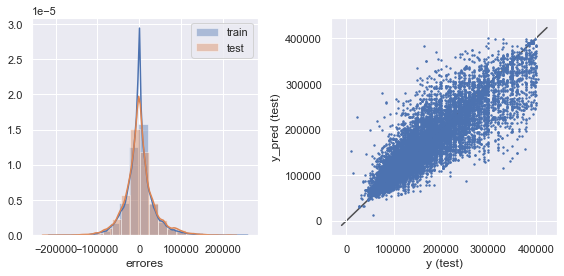

In [113]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Vecinos mas cercanos']

for i, model in enumerate([knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Modelo: Vecinos mas Cercanos hotcoded
Raíz del error cuadrático medio en Train: 17778.06211859554
Raíz del error cuadrático medio en Test: 30740.987579517343


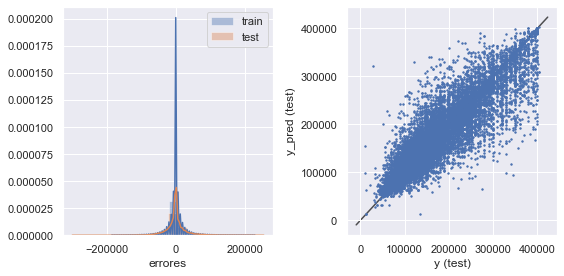

Modelo: Bagging
Raíz del error cuadrático medio en Train: 20374.16860954687
Raíz del error cuadrático medio en Test: 31769.946835380313


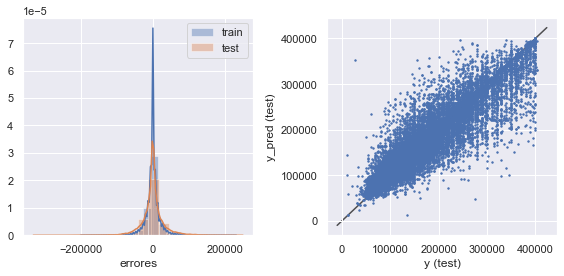

Modelo: Random Forest
Raíz del error cuadrático medio en Train: 19489.823642647756
Raíz del error cuadrático medio en Test: 30500.040303220292


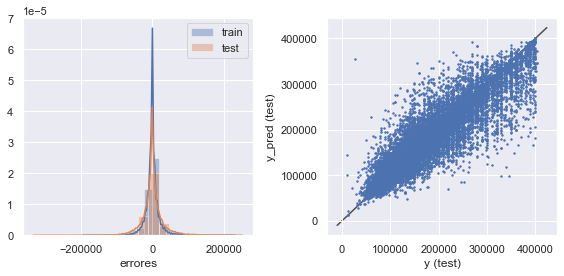

In [114]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Vecinos mas Cercanos hotcoded','Bagging','Random Forest']

for i, model in enumerate([ knn_regressor2, bag, regr]):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(Y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(Y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(Y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

## En los graficos anteriores se puede observar la distribucion del error cuadratico medio en train y test para 3 modelos diferentes. los tres en el caso de Test oscilan por los 30000 y en caso de train entre 20000 y 17000. De acuerdo a la distribucioin se puede asumir que entre mas barato es la propiedad mas precisa es la prediccion, y por el contrario, para propiedades mas costosas la prediccion tiende a tener un mayor margen de error

# Conclusiones

1. El modelo que tiene menor RMSE es el random forest, aunque tiende un poco a estar overfit. Siento que puede ser util regularizar sus parametros para reducir el peso en la prediccion y evitar el alto sesgo

2. Comparado con el proyecto uno, hacer un hot encode de los barrios y reduccion de dimensionalidad de las variables ayudo notablemente al modelo a predecir